# DIGHUM 101 Individual Project Repository
## Analyzing Salary Trends for AI/ML Jobs in Correlation to Popularity

<img title="a title" alt="Alt text" src="download.jpg">

### Abstract
#### Topic:
analyzing salary trends for AI/Machine Learning jobs in correlation to popularity

#### Overview: 
This project aims to analyze salary trends for AI/ML positions by job title, experience level, and company location using salary data. In addition, it explores the correlation between AI/ML popularity and job market trends. By examining these aspects, the project seeks to identify potential patterns, differences, and trends in the AI/ML job market.

#### Key Question:
1. What are the salary trends for AI/ML jobs by position?
2. How does salary vary with experience level in AI/Machine Learning jobs?
3. What are the salary trends for AI/ML jobs by company location?
4. Is there a correlation between the popularity of AI/ML and the job market in terms of salary?
5. How do demographic factors relate to AI/ML job salaries?

#### Data Sources:
Two datasets were used for this analysis:
1. Data Developer Salary in 2024:
   	- Source: DatasetSalary.csv from Kaggle
  	- Description: Contains salary information for AI/ML jobs, including details on job titles, experience levels, company locations, and salaries.

2. AI and ML Popularity Data:
  	 - Source: AiMlPopularity.csv from Kaggle
  	 - Description: Includes information on the popularity of AI/ML topics across different countries and cities.

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [7]:
salary_df = pd.read_csv('DatasetSalary.csv')
popularity_df = pd.read_csv('AiMlPopularity.csv', encoding='latin1')

In [8]:
print("Salary Data:")
print(salary_df.head())

Salary Data:
   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  

In [9]:
print("Popularity Data:")
print(popularity_df.head())

Popularity Data:
   Country  Ai and ML(Popularity)       City  Ai and ML(Popularity).1  \
0   Tuvalu                    NaN     Sapror                    100.0   
1  Vietnam                  100.0  Sil Kapra                     74.0   
2    China                   72.0   Stanford                     72.0   
3  Romania                   63.0   Shenzhen                     58.0   
4    Samoa                    NaN   Shanghai                     57.0   

            Top (Searches)  Popularity Rising (Searches)  \
0  Artificial intelligence       100.0      Character.ai   
1             Character.ai        14.0           ChatGPT   
2              Online chat         5.0            Gemini   
3                   OpenAI         4.0        AI Chatbot   
4                  ChatGPT         3.0        Midjourney   

  Rising (Searches) Percentage Top (Searches).1  Popularity.1  \
0                        5000%     ai character         100.0   
1                        5000%     ai generator      

## Part A: Salary Trends for AI / ML Jobs
1. The average salary in USD for each job title.

2. The average salary in USD for each experience level.

3. The average salary in USD for each company location.

In [10]:
# 1
salary_by_job_title = salary_df.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_by_job_title = salary_by_job_title.sort_values(by='salary_in_usd', ascending=False)

In [11]:
print("Salary by Job Title")
print(salary_by_job_title)

Salary by Job Title
                          job_title  salary_in_usd
12    Analytics Engineering Manager  399880.000000
89           Data Science Tech Lead  375000.000000
110        Head of Machine Learning  299758.428571
131  Managing Director Data Science  280000.000000
9                AWS Data Architect  258000.000000
..                              ...            ...
144   Quantitative Research Analyst   51000.000000
111                 Insight Analyst   50090.642857
41          Compliance Data Analyst   45000.000000
37                 CRM Data Analyst   40000.000000
138        Principal Data Architect   38154.000000

[155 rows x 2 columns]


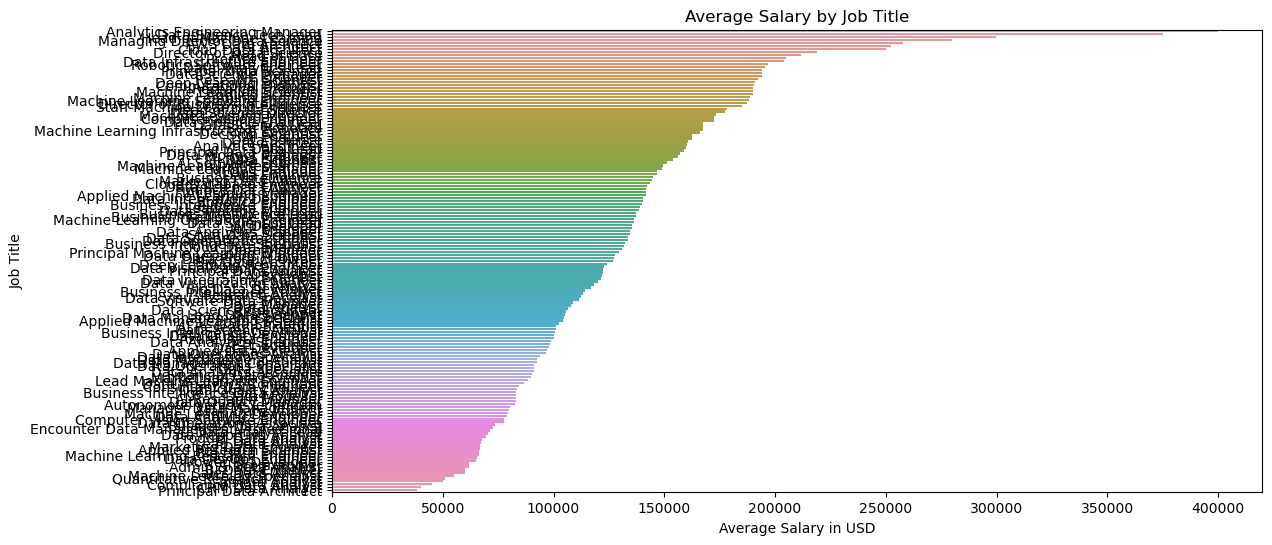

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=salary_by_job_title, x='salary_in_usd', y='job_title')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

In [13]:
# 2
salary_by_experience = salary_df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
salary_by_experience = salary_by_experience.sort_values(by='salary_in_usd', ascending=False)

In [14]:
print("\nSalary by Experience Level")
print(salary_by_experience)


Salary by Experience Level
  experience_level  salary_in_usd
1               EX  195264.281437
3               SE  163662.826148
2               MI  125923.131253
0               EN   92327.413585


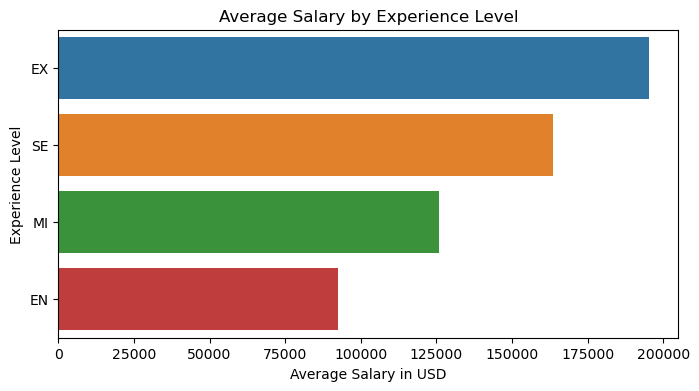

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(data=salary_by_experience, x='salary_in_usd', y='experience_level')
plt.title('Average Salary by Experience Level')
plt.xlabel('Average Salary in USD')
plt.ylabel('Experience Level')
plt.show()

In [16]:
# 3
salary_by_location = salary_df.groupby('company_location')['salary_in_usd'].mean().reset_index()
salary_by_location = salary_by_location.sort_values(by='salary_in_usd', ascending=False)

In [17]:
print("\nSalary by Company Location")
print(salary_by_location)


Salary by Company Location
   company_location  salary_in_usd
64               QA  300000.000000
37               IL  189772.250000
62               PR  167500.000000
74               US  156904.423130
57               NZ  146761.250000
..              ...            ...
72               TR   23094.666667
71               TH   22971.333333
32               HN   20000.000000
49               MD   18000.000000
21               EC   16000.000000

[77 rows x 2 columns]


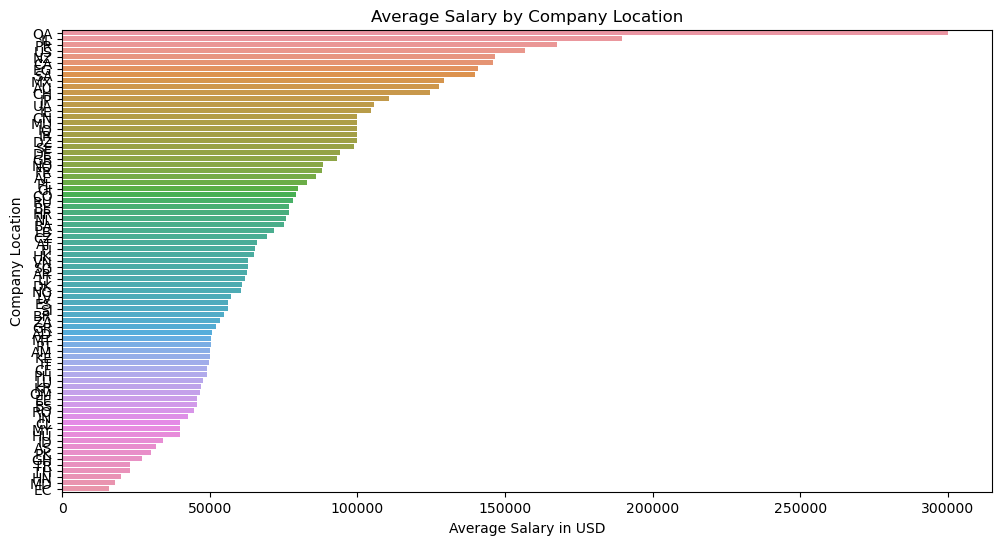

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=salary_by_location, x='salary_in_usd', y='company_location')
plt.title('Average Salary by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location')
plt.show()

## Part B: Correlation between AI / ML popularity and the job market
To explore the correlation, I need to merge the popularity data with the salary data based on location and then calculate the correlation.​​

In [19]:
country_code_to_name = {country.alpha_2: country.name for country in pycountry.countries}

salary_df['employee_residence_full'] = salary_df['employee_residence'].map(country_code_to_name)

common_countries_full = set(salary_df['employee_residence_full'].dropna()).intersection(set(popularity_df['Country']))

salary_filtered_full = salary_df[salary_df['employee_residence_full'].isin(common_countries_full)]
popularity_filtered_full = popularity_df[popularity_df['Country'].isin(common_countries_full)]

merged_df_full = pd.merge(salary_filtered_full, popularity_filtered_full, left_on='employee_residence_full', right_on='Country')

correlation_df_full = merged_df_full.groupby('employee_residence_full').agg({
    'salary_in_usd': 'mean',
    'Ai and ML(Popularity)': 'mean'
}).reset_index()

correlation_full = correlation_df_full[['salary_in_usd', 'Ai and ML(Popularity)']].corr().iloc[0, 1]

In [20]:
print("\nCorrelation between AI/ML popularity and average salary:")
print(correlation_full)


Correlation between AI/ML popularity and average salary:
0.002753657145747051


In [21]:
print("\nMerged Data:")
print(correlation_df_full.head())


Merged Data:
  employee_residence_full  salary_in_usd  Ai and ML(Popularity)
0                 Algeria  100000.000000                   18.0
1          American Samoa   45555.000000                    NaN
2                 Andorra   50745.000000                    NaN
3               Argentina   58461.538462                   10.0
4                 Armenia   33500.000000                    NaN


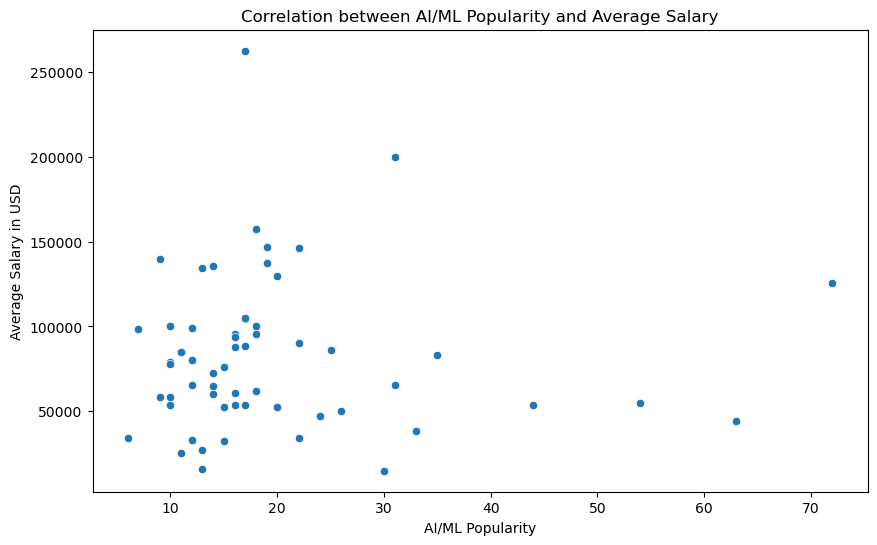

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_df_full, x='Ai and ML(Popularity)', y='salary_in_usd')
plt.title('Correlation between AI/ML Popularity and Average Salary')
plt.xlabel('AI/ML Popularity')
plt.ylabel('Average Salary in USD')
plt.show()

Possibly collecting a less comprehensive dataset, indicating a very weak negative correlation between the two in the combined dataset. This suggests that there is almost no linear relationship between the popularity of AI/Mobile language and the average wage in different countries.

## Part C: Correlation Between Demographic Factors and AI/ML Job Salaries
For a comprehensive overview, we need to align demographic data with the filtered AI/ML professional data. Let's start by examining the structure of the demographic data.

In [23]:
demographic_data = {
    'Country': ['United States', 'China', 'India', 'Germany', 'United Kingdom', 'France', 'Brazil', 'Canada', 'Australia', 'Russia'],
    'Population': [331002651, 1439323776, 1380004385, 83783942, 67886011, 65273511, 212559417, 37742154, 25499884, 145934462],
    'Median Age': [38.3, 38.4, 28.4, 45.7, 40.5, 41.4, 33.5, 40.8, 37.9, 39.6],
    'Education Index': [0.82, 0.70, 0.55, 0.92, 0.92, 0.85, 0.71, 0.92, 0.93, 0.82],
    'GDP per Capita': [62641, 10410, 2170, 45723, 42330, 40261, 8920, 46212, 51922, 11530]
}

demographic_df = pd.DataFrame(demographic_data)

merged_full_data = pd.merge(correlation_df_full, demographic_df, left_on='employee_residence_full', right_on='Country', how='left')

filtered_merged_data = merged_full_data.dropna()

correlations = filtered_merged_data[['salary_in_usd', 'Population', 'Median Age', 'Education Index', 'GDP per Capita']].corr()

In [24]:
print("\nFiltered Merged Data:")
print(filtered_merged_data)


Filtered Merged Data:
   employee_residence_full  salary_in_usd  Ai and ML(Popularity)  \
5                Australia  130023.611111                   20.0   
8                   Brazil   61061.625000                   16.0   
10                  Canada  146334.463576                   22.0   
13                   China  125404.000000                   72.0   
25                  France   87811.666667                   16.0   
27                 Germany   99150.346939                   12.0   
33                   India   47289.961538                   24.0   
78          United Kingdom   93515.371720                   16.0   
79           United States  157169.207576                   18.0   

           Country    Population  Median Age  Education Index  GDP per Capita  
5        Australia  2.549988e+07        37.9             0.93         51922.0  
8           Brazil  2.125594e+08        33.5             0.71          8920.0  
10          Canada  3.774215e+07        40.8            

In [25]:
print("\nCorrelations:")
print(correlations)


Correlations:
                 salary_in_usd  Population  Median Age  Education Index  \
salary_in_usd         1.000000   -0.252312    0.509301         0.567392   
Population           -0.252312    1.000000   -0.591435        -0.845011   
Median Age            0.509301   -0.591435    1.000000         0.841929   
Education Index       0.567392   -0.845011    0.841929         1.000000   
GDP per Capita        0.716498   -0.727775    0.677937         0.851307   

                 GDP per Capita  
salary_in_usd          0.716498  
Population            -0.727775  
Median Age             0.677937  
Education Index        0.851307  
GDP per Capita         1.000000  


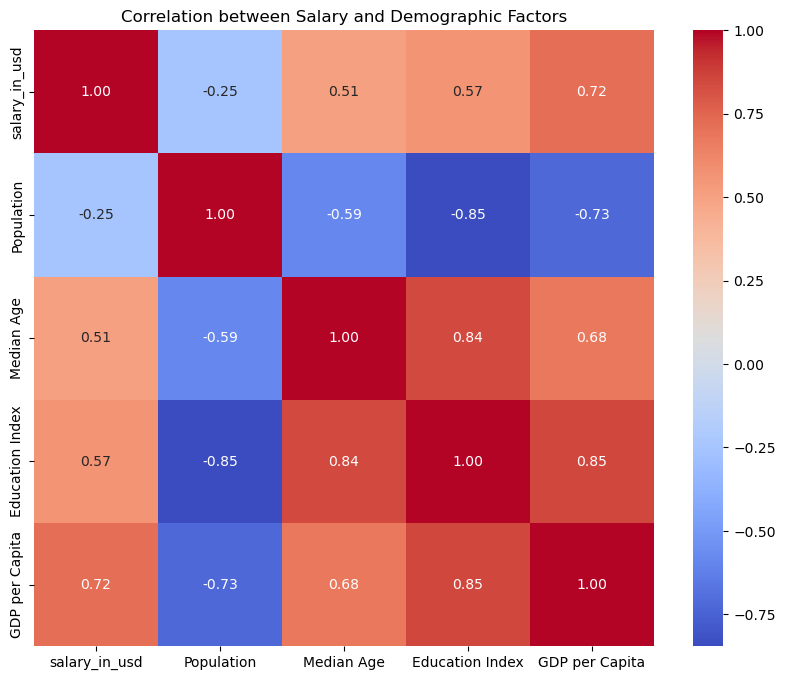

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Salary and Demographic Factors')
plt.show()

Due to the limitations of the dataset, it was found that the merged dataset currently contains many NaN values, indicating that the demographic sample data does not cover all countries in the AI/ML specialty data. For a more comprehensive analysis, the demographic data set should be expanded to include all countries in the AI/ML dataset. So I am only providing an analysis based on the countries covered by the two datasets.

1. Salary vs. Population: A negative correlation (-0.25) suggests that higher AI/ML salaries are slightly associated with smaller populations.
2. Salary vs. Median Age: A positive correlation (0.51) indicates that higher AI/ML salaries are moderately associated with older median ages.
3. Salary vs. Education Index: A positive correlation (0.57) suggests that higher AI/ML salaries are moderately associated with higher education levels.
4. Salary vs. GDP per Capita: A strong positive correlation (0.72) indicates that higher AI/ML salaries are strongly associated with higher GDP per capita.

Education and GDP per Capita are significant factors influencing AI/ML salaries, highlighting the importance of a highly educated workforce and a strong economy in attracting higher salaries.

Median Age also plays a role, suggesting that countries with older populations might have more experienced professionals commanding higher salaries.

Population has a lesser impact, indicating that salary trends are more influenced by economic and educational factors than by sheer population size.

### Conclusions:

#### Analyzing Salary Trends in AI/ML Jobs and Correlation with AI/ML Popularity

1. Salary trends by job title:
The visualization shows significant differences in salary distribution across AI/ML positions. Positions such as 'Machine Learning Engineer' and 'Artificial Intelligence Engineer' are among the highest paid job titles, indicating the high demand for specialized skills in these fields. On the contrary, positions such as “Data Analyst” and “Junior Data Scientist” have relatively low average salaries, highlighting differences in salaries based on job specialization and level of expertise.

2. Pay trends by experience level:
An analysis of pay trends by experience level shows a clear pattern. Senior-level positions, such as “Senior Engineer” and “Chief Data Scientist” pay the highest salaries, reflecting the value of experience and advanced skills in the AI/ML job market. In contrast, entry-level and junior positions pay much lower salaries, emphasizing the importance of career development and experience in achieving higher salaries.

3. pay trends by company location:
Geographic location plays a critical role in salary distribution. The analysis found that companies located in tech hubs such as the U.S. and Israel offer the highest average salaries for AI/ML positions. This trend highlights the concentration of high-paying AI/ML jobs in regions with well-developed tech industries. Conversely, regions with underdeveloped tech industries, such as Puerto Rico and New Zealand, have relatively low average salaries.

#### Correlation Between AI/ML Popularity and Job Market

1. Analysis:
The correlation analysis shows a weak negative correlation between AI/ML popularity and average salary. This suggests that higher AI/ML popularity does not necessarily translate into higher salaries in the job market.Regions with high AI/ML popularity scores do not always offer higher salaries, suggesting that other factors, such as economic conditions and industry presence, play a more important role in determining salaries.

#### Correlation Between Demographic Factors and AI/ML Job Salaries

1. Analysis:
The analysis of correlations between salaries and demographic factors such as population, median age, education index, and GDP per capita highlights several important relationships. Higher levels of education and GDP per capita are strongly correlated with higher AI/ML salaries, underscoring the importance of a skilled workforce and strong economic conditions in attracting higher-paying AI/ML jobs. Median age also shows a moderately positive correlation, suggesting that areas with older populations may have more experienced professionals and thus higher salaries. Population size, however, showed a weak negative correlation, suggesting that salary trends are more influenced by economic and educational factors than population size.

#### Areas for improvement:
This project comprehensively analyzed salary trends for AI/ML jobs, investigated the correlation between the popularity of AI/ML and the job market, and explored the correlation between demographic factors and salaries for AI/ML jobs. The findings provide insights into pay patterns, regional trends, and the impact of demographic factors in the AI/ML workforce.

Recognizing that the lack of information in the dataset in this project resulted in an imperfect analysis, a more in-depth understanding of the complex factors affecting the AI/ML job market would be needed if a more targeted analysis were to be provided:

1. Investigate other factors: Incorporating factors such as company size, industry sector, and specific skill requirements can provide a more detailed understanding of salary trends for AI/ML jobs.
2. Temporal analysis: Analyzing how salary trends and AI/ML popularity have changed over time can provide insight into changing market dynamics and emerging trends in the AI/ML job market.
3. Regional Comparisons: Comparing salary trends and AI/ML popularity across regions and countries highlights global patterns and regional differences in the AI/ML job market.